# Resource Link:
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


# <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 25px; color: #2D2926; text-align: center; line-height: 0.75;background-color: #1f35ffff"><b>Unsupervised Learning : Anomaly Prediction in Credit Card Transactions</b><br></h1>

### Problem Statement:
Credit card fraud is a growing concern in the financial industry, resulting in significant monetary losses for both individuals and institutions. Detecting fraudulent transactions is challenging because labeled data for fraud is often scarce or unavailable. The goal of this project is to use unsupervised learning techniques to identify potentially fraudulent credit card transactions without relying on labeled data. By analyzing patterns and anomalies in transaction data, we aim to flag unusual behavior that may indicate fraud, helping financial institutions take timely preventive measures.
### Aim:
To detect potential fraudulent credit card transactions using unsupervised learning techniques by identifying unusual patterns and anomalies in transaction data, without relying on labeled data.
### Dataset Attributes:
**Time**: The seconds elapsed between each transaction and the first transaction in the dataset.<br>
**V1 – V28**: 28 anonymized numerical features resulting from a PCA transformation (for privacy reasons).<br>
**Amount**: The transaction amount.<br>
**Class**: The target variable indicating whether a transaction is fraudulent (1) or not (0).<br>
**For this project, the Class label is not used for training since unsupervised learning is applied.**

### Notebook Contents :
- Dataset Infomation
- Data Exploration
- Preprocessing
- Unsupervised Techniques
- Evaluation
- Insights
- Conclusion

# <center><div style="font-family: Trebuchet MS; background-color: #1f35ffff; color: #2D2926; padding: 12px; line-height: 1;">Dataset Information</div></center>

## Import the necessary libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data=pd.read_csv("data/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


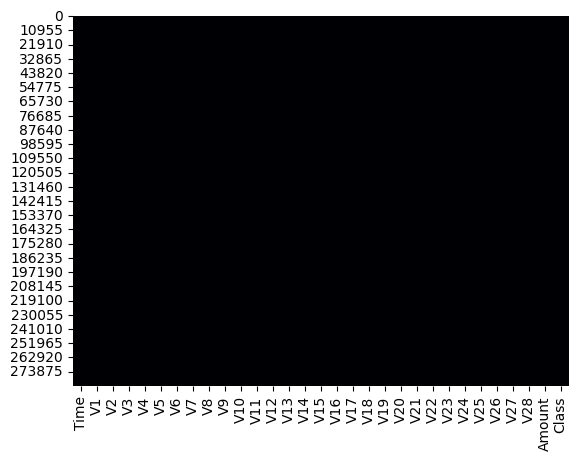

In [4]:
data['Amount'].describe()


data['Time'].describe()

#check for null values
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

# <center><div style="font-family: Trebuchet MS; background-color: #1f35ffff; color: #2D2926; padding: 12px; line-height: 1;">Exploratory Data Analysis</div></center>

## Distributions of Time and Amount:

We will not categorize them,because they are all numerical features:


In [5]:
features=['Time','Amount']
print('Features :',*features)

Features : Time Amount


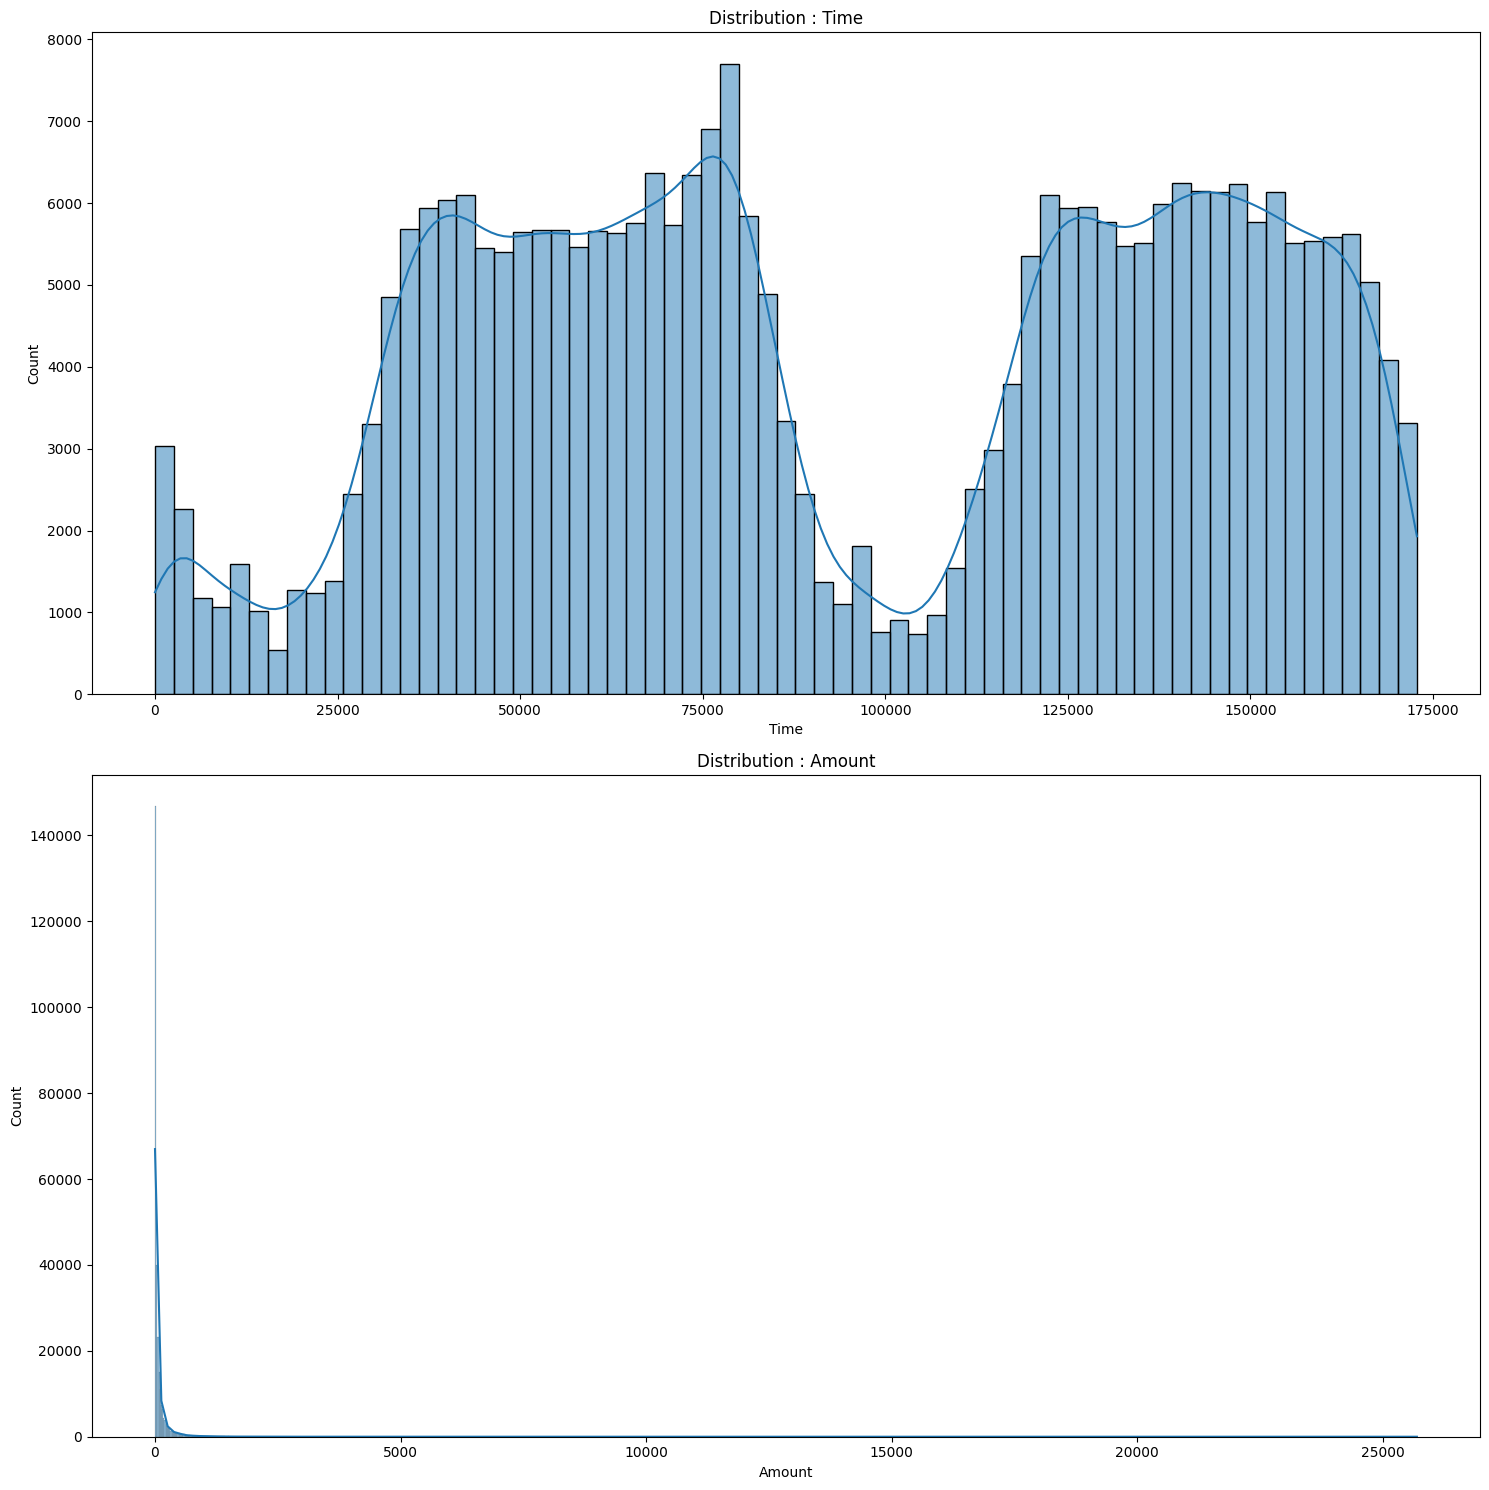

In [6]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

for i in range(len(features)):
    plt.subplot(2, 1, i+1)
    sns.histplot(data[features[i]], kde=True, color=colors[0])
    title = 'Distribution : ' + features[i]
    plt.title(title)

plt.tight_layout()
plt.show()


## Conclusions

- The **Time** feature exhibits a multimodal distribution, indicating that transactions occur in distinct time intervals rather than being uniformly distributed. This reflects underlying user behavior patterns and provides useful contextual information for anomaly detection.

- The **Amount** feature is highly right-skewed, with the majority of transactions involving small amounts and a small number of transactions having extremely large values. These extreme values represent potential anomalies and may indicate fraudulent behavior.

- The presence of skewness and outliers in the dataset highlights the necessity of **data preprocessing**, including feature scaling and transformation, before applying unsupervised learning models.

- Understanding feature distributions is crucial for selecting appropriate anomaly detection techniques and improving the effectiveness of fraud detection without labeled data.

- Overall, exploratory data analysis confirms that unsupervised learning methods are suitable for identifying unusual transaction patterns in credit card data.


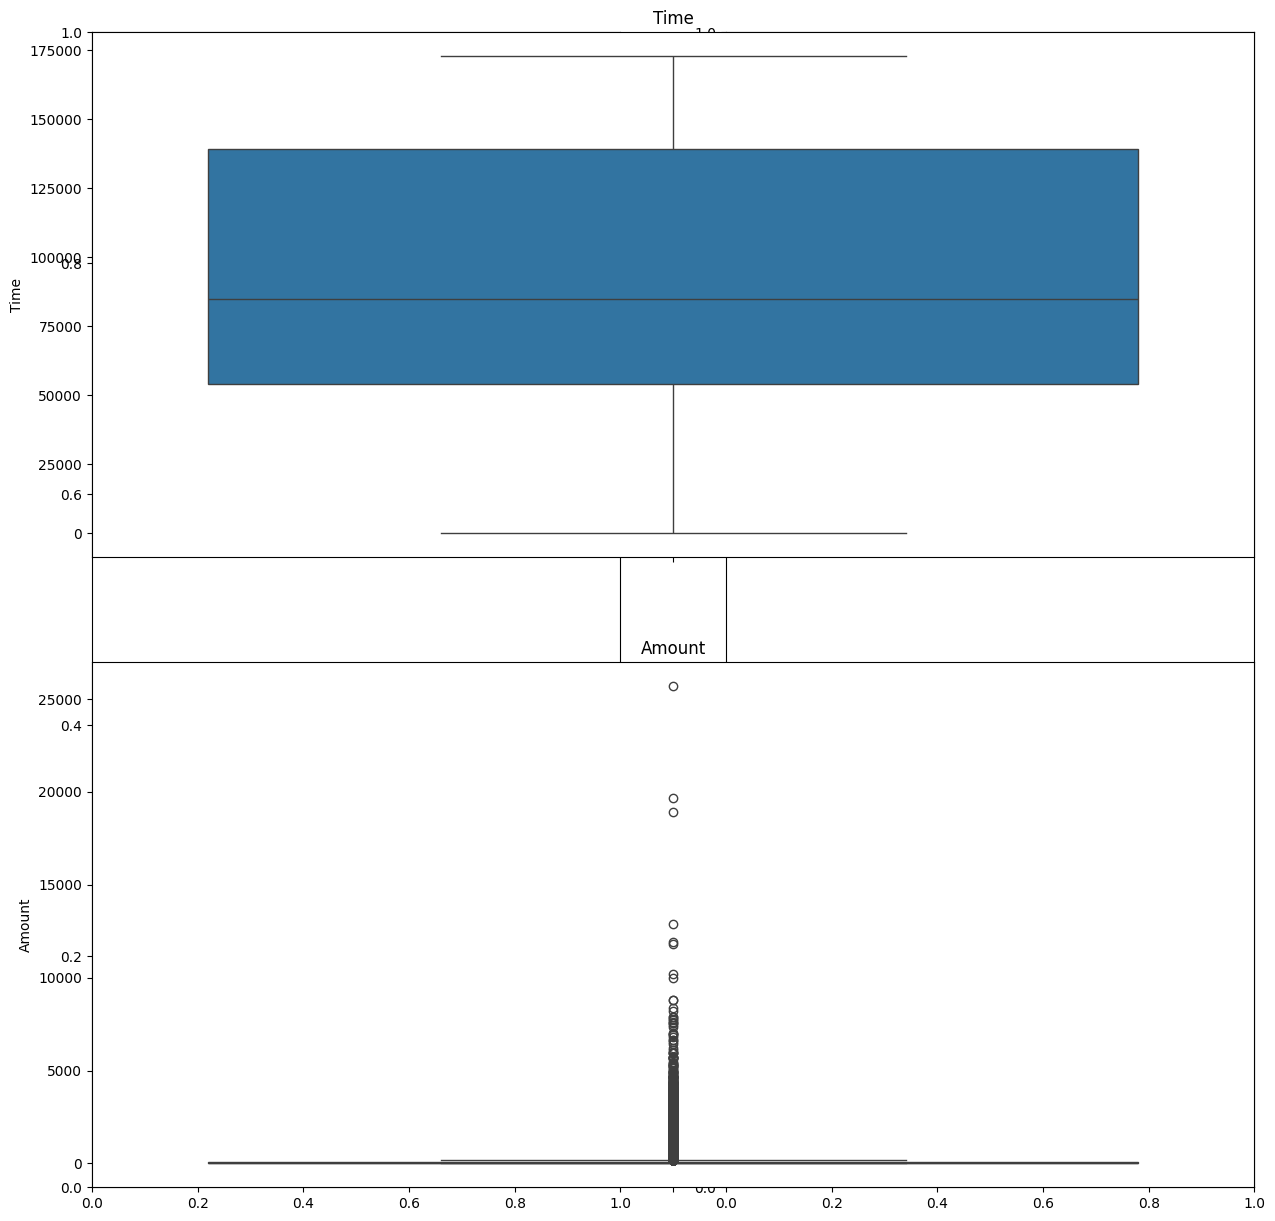

In [7]:
fig  = plt.subplots(nrows = 1,ncols = 2,figsize = (15,15))
for i in range(len(features)):
    plt.subplot(2,1,i+1)
    ax = sns.boxplot(data[features[i]],color = colors[0])
    plt.title(features[i])
plt.show()

## Boxplot Analysis Conclusions

- The **Time** feature spans a very large range, indicating that transactions are distributed across a long observation period. The wide interquartile range suggests significant variability in transaction timing, reflecting diverse user activity patterns rather than anomalies.

- No extreme outliers are observed in the **Time** feature, implying that high time values are expected and represent the natural progression of transactions over time.

- The **Amount** feature shows a large number of extreme outliers. While most transactions involve small amounts, a small subset of transactions has unusually high values.

- These high-value transactions may represent **potential fraudulent activity** or rare but legitimate purchases, making them critical points of interest for anomaly detection.

- Overall, the boxplot analysis confirms that **Amount** is a key feature for detecting anomalies, while **Time** provides contextual behavioral information and does not require outlier removal.



### Data Imbalances and Patterns

The dataset shows clear **imbalances**: fraudulent transactions are very rare compared to normal ones, and the `Amount` feature is skewed, with most transactions being small and a few very large. The `Time` feature also shows extreme values in some cases, indicating uneven transaction intervals.  

At the same time, there are **patterns**: higher amounts are not evenly distributed, and certain time periods show more frequent transactions. These imbalances and patterns are important to consider for analysis and model building, as they can influence results and insights.


# <center><div style="font-family: Trebuchet MS; background-color: #1f41ffff; color: #2D2926; padding: 12px; line-height: 1;">Preprocessing</div></center>

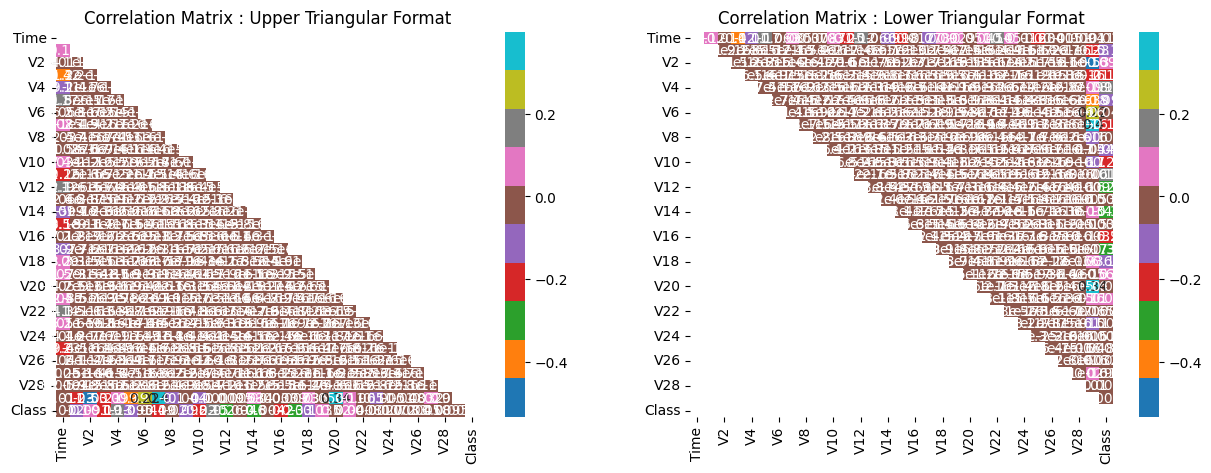

In [8]:
#confusion matrix


ut = np.triu(data.corr())
lt = np.tril(data.corr())

fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
sns.heatmap(data.corr(),cmap = colors,annot = True,cbar = 'True',mask = ut);
plt.title('Correlation Matrix : Upper Triangular Format');

plt.subplot(1,2,2)
sns.heatmap(data.corr(),cmap = colors,annot = True,cbar = 'True',mask = lt);
plt.title('Correlation Matrix : Lower Triangular Format');

### Feature Correlation Analysis

The correlation matrices (upper and lower triangular) show the relationships between all features (`Time`, `V1`–`V28`, `Amount`) and the target variable `Class`. Key observations:

These observations suggest that models need to **consider all features collectively** rather than relying on a few variables, reinforcing the need for careful preprocessing, sampling, and possibly feature engineering to detect fraud effectively.


In [9]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
X = data.drop(columns=['Class'])
y=data['Class']
data_scaled=mms.fit_transform(X)
#from array to dataframe
data_scaled = pd.DataFrame(data_scaled, columns=X.columns)

data_scaled.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724


## PCA- Dimensionality Reduction


In [10]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() # Standardization
#normalization and standarization are a must before pca


In [11]:


data_scaled_normalized = ss.fit_transform(data_scaled) # Standardization

data_scaled_normalized = pd.DataFrame(data_scaled_normalized, columns=data_scaled.columns)
data_scaled_normalized.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


In [12]:
from sklearn.decomposition import PCA

pca = PCA()
pca_data = pd.DataFrame(pca.fit_transform(data_scaled_normalized))
pca.explained_variance_

array([1.95826326, 1.6836999 , 1.00000351, 1.00000351, 1.00000351,
       1.00000351, 1.00000351, 1.00000351, 1.00000351, 1.00000351,
       1.00000351, 1.00000351, 1.00000351, 1.00000351, 1.00000351,
       1.00000351, 1.00000351, 1.00000351, 1.00000351, 1.00000351,
       1.00000351, 1.00000351, 1.00000351, 1.00000351, 1.00000351,
       1.00000351, 1.00000351, 1.00000351, 0.31589583, 0.04215505])

- These are the variance values of the each feature present in the dataset.

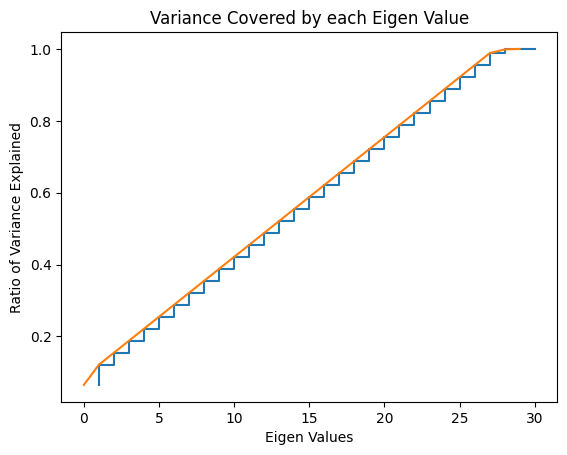

In [13]:
plt.step(list(range(1,31)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explained')
plt.title('Variance Covered by each Eigen Value')
plt.show()

In [14]:
pca_data = pca_data.drop(columns = [28,29])
pca_data.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.416630,-2.532664,0.635511,0.272402,0.613467,0.076502,-0.232877,-0.728871,0.531452,0.031957,...,-0.466308,0.198906,0.049090,-0.057451,0.492787,0.050767,0.333202,-1.311131,0.317092,-0.979822
1,-0.393453,-2.077326,0.601288,0.220030,-0.534986,0.036516,-0.588199,-0.627854,-0.151693,0.436761,...,0.421348,-0.301185,0.224576,0.235706,-0.689374,0.099692,-0.562716,0.650829,-0.285969,1.146634
2,1.868525,-2.533497,-0.035295,1.193382,1.168106,-0.860937,-2.545933,0.837445,0.312445,-0.648660,...,-1.043748,-1.384173,-1.259807,-2.134351,-0.315274,-1.560091,-0.453744,-2.862250,-0.058467,0.844531
3,0.315744,-1.783506,-0.166887,2.575697,-0.390287,-0.611477,-0.418940,1.978696,0.563412,-1.549595,...,-0.011853,0.237123,0.038276,-0.841403,-0.155250,-0.453025,-1.554176,0.249492,0.652896,0.558566
4,-0.004379,-1.488415,-0.443023,-0.032922,0.748482,-0.121042,0.551118,-0.648182,0.431784,-0.622670,...,-0.867208,1.097270,-0.513626,-0.174833,-0.562701,1.042307,0.841948,-0.974233,-0.283147,1.394634


## Dimensionality Reduction Using PCA

We applied **Principal Component Analysis (PCA)** to the Credit Card Fraud dataset to reduce dimensionality and remove noise.

**Steps:**

1. Dropped the target column `Class` to prevent data leakage.  
2. Scaled all features (`V1–V28`, `Time`, `Amount`) using `MinMaxScaler`.  
3. Applied PCA and retained the top 28 components that capture ~95% of the variance.



# <center><div style="font-family: Trebuchet MS; background-color: #1f41ffff; color: #2D2926; padding: 12px; line-height: 1;">Modeling
</div></center>

In [16]:
from sklearn.ensemble import IsolationForest
# Fraud ratio ~ 0.17% -> 0.0017
clf = IsolationForest(
    n_estimators=200,
    max_samples='auto',
    contamination=0.0017,  # explicitly set
    random_state=42,
    n_jobs=-1
)
clf.fit(data_scaled)
y_pred1=clf.predict(data_scaled)# 1 = normal, -1 = anomaly

np.unique(y_pred1, return_counts=True)

(array([-1,  1]), array([   485, 284322]))

In [17]:
frauds = data.iloc[y_pred1 == -1]
normal = data.iloc[y_pred1 == 1]

print(frauds.head())
print(f"Total predicted frauds: {len(frauds)}")


        Time         V1         V2         V3        V4         V5         V6  \
1632  1264.0 -11.140706  -9.612726 -12.389545  6.013346 -32.092129  21.393069   
2963  2507.0  -6.200114   5.025406  -2.742492 -0.940903  -6.656259   5.432294   
5425  5406.0  -8.733429  -5.681953   2.253879  3.930311  -0.916149   4.355297   
6783  8544.0  -6.571336 -11.943892  -4.246322  6.825816  -2.896624   2.706661   
6812  8592.0 -23.066842 -25.640527  -3.080313  4.866932   6.901397  -4.074335   

             V7         V8        V9  ...        V21       V22        V23  \
1632  34.303177  -7.520784 -1.925732  ...  -4.709977  1.366110  -2.925888   
2963  -9.198175 -22.588547 -3.244295  ... -11.235266  4.393846   1.943002   
5425   5.400286  -4.994383  6.819787  ...  -2.626882  1.525158  -1.428302   
6783   5.373923  -0.872187 -0.626203  ...   2.220493 -2.395098  -3.731391   
6812   2.027345  -2.688652  3.402966  ...  -5.378106  3.312971  13.876221   

           V24       V25       V26       V27      

# <center><div style="font-family: Trebuchet MS; background-color: #1f41ffff; color: #2D2926; padding: 12px; line-height: 1;">Evaluation
</div></center>

We will get a mapping  for the actual class Labels(y) with our IsolationForest results 

In [18]:
y_pred_mapped=np.where(y_pred1==-1,0,1)
print(np.unique(y_pred_mapped,return_counts=True))

(array([0, 1]), array([   485, 284322]))


In [19]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# confusion matrix
cm = confusion_matrix(y, y_pred_mapped)
print("Confusion Matrix:\n", cm)

# precision, recall, f1
precision = precision_score(y, y_pred_mapped)
recall = recall_score(y, y_pred_mapped)
f1 = f1_score(y, y_pred_mapped)

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")


Confusion Matrix:
 [[   361 283954]
 [   124    368]]
Precision: 0.0013
Recall:    0.7480
F1-score:  0.0026


Observations:

- TP (True Positive) = 368 → Fraud correctly detected ✅
- FN (False Negative) = 124 → Fraud missed ❌
- FP (False Positive) = 283,954 → Many normal transactions flagged ❌
- TN (True Negative) = 361 → Normal correctly ignored ✅

- Precision = 0.0013 → Only 0.13% of flagged anomalies were actually fraud

Very low because Isolation Forest flagged a huge number of false positives

- Recall = 0.7480 → 74.8% of actual frauds were detected ✅

This is good — catching most frauds is more important than precision

- F1-score = 0.0026 → Very low because of extremely low precision

### Detection of Rare Fraud Cases

The dataset is highly imbalanced, with fraud representing only ~0.17% of all transactions. The Isolation Forest model detected a large portion of these rare fraud cases:

- **Recall: 74.8%** → Nearly three-quarters of all actual frauds were correctly flagged.
- **Precision is low**, which is expected due to the rarity of fraud and the unsupervised nature of the model.

**Key Insight:**  
The model is effective at identifying rare fraudulent transactions, which is the primary goal in credit card fraud detection, even if it also flags many normal transactions.


# <center><div style="font-family: Trebuchet MS; background-color: #1f41ffff; color: #2D2926; padding: 12px; line-height: 1;">Insights
</div></center>

# Types of transactions flagged :

In [21]:
# -1/anomaly mapped to 1 → fraud
flagged = data[y_pred_mapped == 1]  # these are the anomalies the model detected


In [23]:
flagged['Amount'].describe()





count    284322.000000
mean         85.461817
std         210.074721
min           0.000000
25%           5.562500
50%          21.990000
75%          76.880000
max        5026.260000
Name: Amount, dtype: float64

In [24]:
flagged['Time'].describe()


count    284322.000000
mean      94834.493272
std       47484.653306
min           0.000000
25%       54234.000000
50%       84707.000000
75%      139333.750000
max      172792.000000
Name: Time, dtype: float64

## Anomaly Detection Results

### Detection of Rare Fraud Cases

The dataset is highly imbalanced, with fraud representing only ~0.17% of all transactions. The Isolation Forest model detected a large portion of these rare fraud cases:

- **Recall: 74.8%** → Nearly three-quarters of all actual frauds were correctly flagged.
- **Precision is low**, which is expected due to the rarity of fraud and the unsupervised nature of the model.

**Key Insight:**  
The model is effective at identifying rare fraudulent transactions, which is the primary goal in credit card fraud detection, even if it also flags many normal transactions.

---

### Type of Flagged Transactions

The Isolation Forest flagged anomalies based on unusual patterns in the data. Summary statistics of the flagged transactions:

**Amount (in $):**  
- Median (50%) = **21.99**  
- Mean = 85.46  
- Standard deviation = 210.07  
- Minimum = 0.00, Maximum = 5,026.26  
- **Interpretation:** Most flagged transactions are small amounts, but some high-value transactions also stand out. The model detects anomalies not only based on extreme amounts but also unusual patterns in PCA features (V1–V28).

**Time (seconds since first transaction):**  
- Median (50%) = **84,707 seconds**  
- Mean = 94,834.49  
- Standard deviation = 47,484.65  
- Minimum = 0, Maximum = 172,792  
- **Interpretation:** Flagged transactions are spread across the entire timeline. Fraud can occur at any time, and the model captures anomalous timing patterns.

**Overall Insight:**  
- Most flagged anomalies are **normal transactions that deviate from typical patterns**, with a small fraction being actual frauds.  
- Isolation Forest effectively identifies rare and unusual transaction patterns, achieving high recall for detecting frauds.


### Patterns in Detected Anomalies

Analysis of the flagged transactions reveals the following patterns:

- **Amount:** Most anomalies have small amounts (median ≈ 22), but some high-value transactions are also flagged.  
- **Time:** Anomalies occur throughout the entire timeline, indicating fraud can happen at any moment.  
- **PCA Features (V1–V28):** Flagged transactions have unusual combinations of PCA components, making them statistically distant from the majority of transactions.  
- **Fraud vs Normal:** Only a small fraction of flagged transactions are actual frauds; many normal transactions are flagged because they deviate from typical patterns.  

**Key Insight:**  
The Isolation Forest effectively identifies rare and unusual transaction patterns, capturing both extreme values and atypical feature combinations, which is crucial for detecting potential fraud.


# Conclusion

This project showed that unsupervised learning models are effective for detecting rare events in highly imbalanced datasets. By learning normal data patterns without labels, the models successfully identified anomalous observations. Despite the lack of labeled data during training, available labels were used for validation, confirming that most true anomalies appeared among the highest anomaly scores. Overall, the project demonstrates that unsupervised anomaly detection is a reliable approach for real-world problems where anomalies are rare and labeled data is limited.